In [1]:
import ROOT
import sys
import os
import numpy as np

Welcome to JupyROOT 6.20/06


In [2]:
stack_i = ROOT.THStack("", "")
ROOT.gROOT.SetBatch()
ROOT.gStyle.SetOptStat(0)


In [3]:
infile = ROOT . TFile ("/eos/user/s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/Final_training/MyrootFile_after_testing_on_training_Tprime_1000-1200_all_five_background.root"," READ ")
infile.ls();

TFile**		/eos/user/s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/Final_training/MyrootFile_after_testing_on_training_Tprime_1000-1200_all_five_background.root	
 TFile*		/eos/user/s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/Final_training/MyrootFile_after_testing_on_training_Tprime_1000-1200_all_five_background.root	
  KEY: TH1D	datafile;1	datafile
  KEY: TH1D	ttgg;1	ttgg
  KEY: TH1D	ttjets;1	ttjets
  KEY: TH1D	diphotongamma;1	diphotongamma
  KEY: TH1D	gjets;1	gjets
  KEY: TH1D	ttgjets;1	ttgjets
  KEY: TH1D	Tprime_600;1	Tprime_600
  KEY: TH1D	Tprime_700;1	ttjets
  KEY: TH1D	SMHiggs;1	ttjets


In [4]:
hist_data = infile.Get("datafile")
hist_1 = infile.Get("ttgg")
hist_2 = infile.Get("ttjets")
hist_3 = infile.Get("diphotongamma")
hist_4 = infile.Get("gjets")
hist_5 = infile.Get("ttgjets")
hist_6 = infile.Get("Tprime_600")
hist_7 = infile.Get("Tprime_700")
hist_8 = infile.Get("SMHiggs")

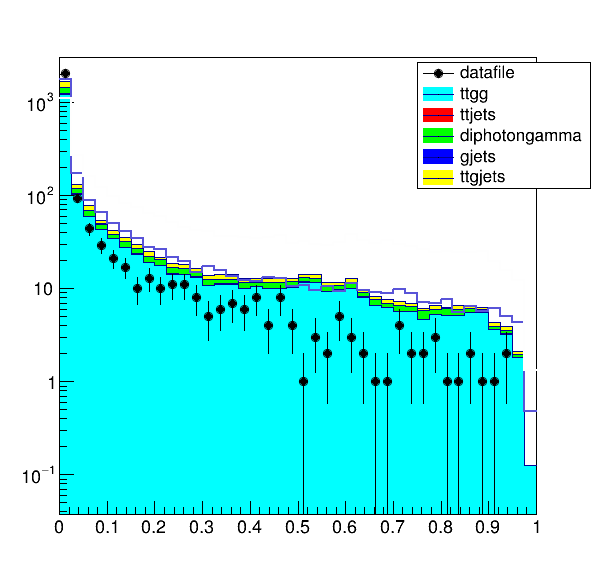

In [5]:
hist_data.SetMarkerStyle(20)
hist_data.SetMarkerSize(1)
hist_data.SetMarkerColor(1)
hist_data.SetLineWidth(1)
hist_data.SetLineColor(1)

totalMC= ROOT.TH1F("totalMC", "Events;DNN score;",40,0,1)
totalMC.Add(hist_1)
totalMC.Add(hist_2)
totalMC.Add(hist_3)
totalMC.Add(hist_4)
totalMC.Add(hist_5)
# totalMC.Add(hist_8)
totalMCYield=totalMC.Integral()
DataYield= hist_data.Integral()
DataMC_scaleF=DataYield/totalMCYield  

hist_1.Scale(DataMC_scaleF)
hist_2.Scale(DataMC_scaleF)
hist_3.Scale(DataMC_scaleF)
hist_4.Scale(DataMC_scaleF)
hist_5.Scale(DataMC_scaleF)
hist_6.Scale(DataMC_scaleF)
hist_7.Scale(DataMC_scaleF)
hist_8.Scale(DataMC_scaleF)

hist_1.SetFillColor(7)
hist_2.SetFillColor(2)
hist_3.SetFillColor(3)
hist_4.SetFillColor(4)
hist_5.SetFillColor(5)
hist_8.SetFillColor(6)

# stack_i.Add(hist_0)
# hist_0.SetFillColor(7)
stack_i.Add(hist_1)
stack_i.Add(hist_2)
stack_i.Add(hist_3)
stack_i.Add(hist_4)
stack_i.Add(hist_5)
# stack_i.Add(hist_8)

legend = ROOT.TLegend()

hist_6.SetLineWidth(2)
hist_6.SetLineColor(9)
hist_7.SetLineWidth(2)
hist_7.SetLineColor(10)

canvas = ROOT.TCanvas('canvas',"",600,600)

legend = ROOT.TLegend(0.70,0.89,0.99,0.67)
legend.AddEntry(hist_data)
legend.AddEntry(hist_1)
legend.AddEntry(hist_2)
legend.AddEntry(hist_3)
legend.AddEntry(hist_4)
legend.AddEntry(hist_5)

# legend.AddEntry(hist_8)


stack_i.Draw("hist")
hist_6.Draw("SAME hist")
hist_7.Draw("SAME hist")
# legend.AddEntry(hist_6)
# legend.AddEntry(hist_7)
hist_data.Draw("E0 x0 SAME")

canvas.SetLogy()
legend.Draw()
canvas.Draw()

In [7]:
canvas.Delete()
#from ROOT import gROOT 
#gROOT.GetListOfCanvases().Draw()

Warning in <TCanvas::Delete()>: may not use this method
